In [1]:
import math
import numpy as np
from numpy import linalg

#import jax
import torch
from torch import tensor
from torch.autograd.functional import jacobian, hessian

pi=math.pi

In [2]:
BraninHoo = lambda x: (x[...,1] - (5.1*x[...,0]**2/4/pi/pi) +(5*x[...,0]/pi)-6)**2 + (10-10/8/pi)*torch.cos(x[...,0])+10
rosenbrock = lambda x: 100*(x[...,1] - x[...,0]**2)**2 + (x[...,0]-1)**2

In [3]:
def Branin(x0,x1):
    return (x1 - (5.1*x0**2/4/pi/pi) +(5*x0/pi)-6)**2 + (10-10/8/pi)*np.cos(x0)+10

def rosen(x0,x1):
    return 100*(x1 - x0**2)**2 + (x0-1)**2

In [8]:
# TAYLOR MODEL PLOTTING
# TAYLOR EXPENSION
# f(x+pk) = f(x) + hessian_f(x)T*pk +0.5 pk^T hessian_f^2(x)*pk
def taylor_appr(function, x, pk, order=1):
    # calculate hessian, gk
    gk = hessian()
    # calculate hessian^2, Bk
    Bk = hessian()
    
    appr = function(x)+ gk.dot(pk) 
    if (order ==2):
        pkBk = pk.dot(Bk)
        appr += 0.5*pkBk.dot(pk)
        
    return appr

def grad(x, f, order=1):
    if type(x)!= torch.tensor:#isinstance(x, np.array):
        x = torch.tensor(x, dtype=torch.float32)
    if order==1:
        return jacobian(f,x)
    elif order==2:
        return hessian(f,x)
    else: return 0

def backtrack(f,x, pk, c1=.5):
    # function, [x0,x1], gradient, search direction, c1
    alpha = 5
    rho=0.9
    #x_ = torch.tensor(x, dtype=torch.float32)
    grad = jacobian(f,x)
    """
    print(f'x: {x}')
    print(f'pk: {pk}')
    print(f'f at x_k+1: {f(x_+alpha*pk)}')
    print(f'x point at x_k+1: {x_+alpha*pk}')
    
    print(f'f  taylor appr: {f(x_)+c1*alpha*grad*pk}')
    print(f'f  at x: {f(x_)}')
    print(f'f  taylor appr slope: {c1*alpha*grad*pk}')
    
    print(' ')
    print(f'grad  {grad}')
    print(f'pk: {pk}')
    print(f'grad*pk  {grad*pk}')
    
    print(' ')
    print(f'grad*pk  {grad.dot(pk)}')
    print(f'pk*grad: {pk.dot(grad)}')
    """
    while (f(x+alpha*pk)>= f(x)+c1*alpha*grad.dot(pk)):
        alpha = alpha* rho
    return alpha



In [9]:

#x=[1,2]
#x=[1,2]
x=[5,15]
x = torch.tensor(x, dtype=torch.float32)
delta = .005 
gradient=grad(x,BraninHoo)
grad_norm = linalg.norm(gradient, np.inf)

while (grad_norm >=delta):
    # gradient calculations
    grad(x, BraninHoo)
    print(gradient)
    pk = -(gradient/grad_norm)
    
    # backtracting
    alpha = backtrack(BraninHoo, x, pk)
    x=x+pk*alpha
    gradient=grad(x,BraninHoo)
    grad_norm = linalg.norm(gradient, np.inf)
    
print(f'min found{x}')
print(f'gradient norm: {grad_norm}')
    
    
    
    #[x,f,jacobs,iteration]# return min x_star, function values at x, array of gradient norms, iterations it took

tensor([17.4365, 27.4563])
tensor([ 5.2088, 12.9479])
tensor([-0.6434,  1.8175])
tensor([-11.9864,  -3.6855])
tensor([ 0.5519, -0.9372])
tensor([-0.8783, -0.6188])
tensor([ 0.2196, -0.3482])
tensor([-0.3187, -0.2445])
tensor([ 0.0651, -0.1461])
tensor([-0.1307, -0.0679])
tensor([ 0.0128, -0.0358])
tensor([-0.0262, -0.0114])
tensor([ 0.0001, -0.0059])
min foundtensor([3.1420, 2.2745])
gradient norm: 0.003953374456614256


C:\Users\vedat\AppData\Local\Temp\ipykernel_24216\3295788867.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


In [10]:
# subtrack a vector from a list of vectors
# do grid point - x_not
x=[6,10]
grid_size=10
x1=np.linspace(-5,10,grid_size)
x2=np.linspace(0,15,grid_size)
x1=x1-x[0]
x2 = x2-x[1]
X1, X2 = np.meshgrid(x1,x2)
ii=0

grid = torch.zeros(grid_size, grid_size, 2)
for i in x1:
    jj=0
    for j in x2: 
        grid[ii][jj] = torch.tensor([i,j])
        jj+=1
    ii+=1

In [35]:
y1=np.linspace(-5,10,10)
y2=np.linspace(0,15,10)
Y1, Y2 = np.meshgrid(y1,y2)

# plot taylor model
# single point ref
# array of grid points

x=[6,10]
fk=Branin(x[0],x[1])
#first order
gk=grad(x, BraninHoo, 1)
ii=0
jj=0
taylor = np.zeros([10,10])

for i in grid:
    for j in grid[ii]:
        taylor[ii][jj]=int(fk+gk.dot(j))
        jj=+1
    ii=+1
 
#second order
Bk=grad(x, BraninHoo, 2)
taylor

array([[-117.,  149.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,  155.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.]])

In [32]:
ii=0
for i in grid:
    for j in grid[ii]:
        print(j)
    ii=+1
    

tensor([-11., -10.])
tensor([-11.0000,  -8.3333])
tensor([-11.0000,  -6.6667])
tensor([-11.,  -5.])
tensor([-11.0000,  -3.3333])
tensor([-11.0000,  -1.6667])
tensor([-11.,   0.])
tensor([-11.0000,   1.6667])
tensor([-11.0000,   3.3333])
tensor([-11.,   5.])
tensor([ -9.3333, -10.0000])
tensor([-9.3333, -8.3333])
tensor([-9.3333, -6.6667])
tensor([-9.3333, -5.0000])
tensor([-9.3333, -3.3333])
tensor([-9.3333, -1.6667])
tensor([-9.3333,  0.0000])
tensor([-9.3333,  1.6667])
tensor([-9.3333,  3.3333])
tensor([-9.3333,  5.0000])
tensor([ -9.3333, -10.0000])
tensor([-9.3333, -8.3333])
tensor([-9.3333, -6.6667])
tensor([-9.3333, -5.0000])
tensor([-9.3333, -3.3333])
tensor([-9.3333, -1.6667])
tensor([-9.3333,  0.0000])
tensor([-9.3333,  1.6667])
tensor([-9.3333,  3.3333])
tensor([-9.3333,  5.0000])
tensor([ -9.3333, -10.0000])
tensor([-9.3333, -8.3333])
tensor([-9.3333, -6.6667])
tensor([-9.3333, -5.0000])
tensor([-9.3333, -3.3333])
tensor([-9.3333, -1.6667])
tensor([-9.3333,  0.0000])
tensor(

In [1]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


NameError: name 'np' is not defined

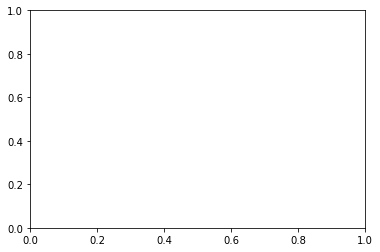

In [3]:
fig, ax = plt.subplots(1, 1)
#ax.grid()
x1=np.linspace(-5,10,10)
x2=np.linspace(0,15,10)
X1, X2 = np.meshgrid(x1,x2)


[[308.12909601 162.89542418  90.2866907   55.60211264  22.81724065
    5.11168719  14.3413983   20.18431209   8.48953212  10.96088904]
 [253.61567418 123.20470795  63.02637433  38.37989042  13.24080685
    0.78873608  12.87962416  19.1914092    5.57319475   3.72881146]
 [204.6578079   89.06954726  41.32161352  26.71322375   9.2199286
    2.02134053  16.97340558  23.75406186   8.21241294   2.05228945]
 [161.25549718  60.48994214  25.17240826  20.60211264  10.75460591
    8.80950054  26.62274256  33.87227009  16.40718668   5.93132298]
 [123.40874201  37.46589257  14.57875856  20.04655709  17.84483877
   21.1532161   41.82763509  49.54603386  30.15751598  15.36591208]
 [ 91.1175424   19.99739855   9.54066442  25.04655709  30.49062719
   39.05248721  62.58808317  70.77535319  49.46340083  30.35605673]
 [ 64.38189835   8.08446009  10.05812583  35.60211264  48.69197117
   62.50731389  88.90408682  97.56022808  74.32484124  50.90175693]
 [ 43.20180985   1.72707719  16.13114279  51.71322375  7

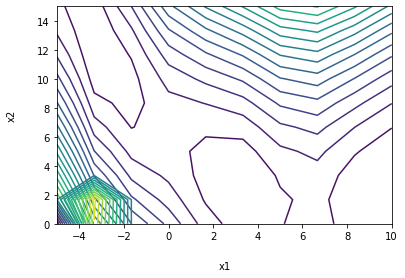

In [36]:

#fig = plt.figure(figsize = (20,20))
#ax = plt.axes(projection ='3d')
fig, ax = plt.subplots(1, 1)
#ax.grid()
#range(start, stop, step) wants integer input
#np.linspace(start, end, number of points between)
x1=np.linspace(-5,10,10)
x2=np.linspace(0,15,10)
X1, X2 = np.meshgrid(x1,x2)

# plot taylor model
# single point ref
# array of grid points
"""
x=[6,10]
fk=BraninHoo(x)
#first order
gk=grad(x, Branin, 1)
#fk+gk.dot(grid)
#second order
Bk=grad(x, Branin, 2)
"""

#X = torch.tensor([X1,X2], dtype=torch.float32)
#X2 = torch.tensor(X2, dtype=torch.float32)
#print(X1)
X3=Branin(X1,X2)

print(X3)
ax.contour(X1, X2, X3,20)
ax.contour(X1, X2, taylor,20)
#surf = ax.plot_surface(X1, X2, X3, cmap = plt.cm.cividis)
#circle=np.linspace(0,2*pi,50)
    
"""
r=3
x_center=[6,10]
x_c = x_center[0]+np.linspace(-r,r,20)
y_c = x_center[1]+np.linspace(-r,r,20)

            
ax.plot(x_c,y_c)
ax.set_title('Branin Hoo')

##
X_c, Y_c = np.meshgrid(x_c,y_c)
XX3 = grad(X_c,BraninHoo, 2)
ax.contour(X_c, Y_c, XX3,5)
"""
# Set axes label
ax.set_xlabel('x1', labelpad=20)
ax.set_ylabel('x2', labelpad=20)
#ax.set_zlabel('x3', labelpad=20)

#fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [1]:
fig = plt.figure(figsize = (20,20))
ax = plt.axes(projection ='3d')
#fig, ax = plt.subplots(1, 1)
ax.grid()

#range(start, stop, step) wants integer input
#np.linspace(start, end, number of points between)
x1=np.linspace(-5,10,50)
x2=np.linspace(-5,10,50)
X1, X2 = np.meshgrid(x1,x2)
X3=rosenbrock(X1,X2)

#ax.contour(X1, X2, X3,20)
surf = ax.plot_surface(X1, X2, X3, cmap = plt.cm.cividis)
ax.set_title('Rosenbrock')

# Set axes label
ax.set_xlabel('x1', labelpad=20)
ax.set_ylabel('x2', labelpad=20)
ax.set_zlabel('x3', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

NameError: name 'plt' is not defined